In [129]:
### plot several examples that may needs QCs
# (1) 2024 SD-1041 streaks 
# (2) shallow bottom (where it needs remove the bottom) 
# (3) remove tides (find a case where tidal current is significant)
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import cftime
from scipy import signal

In [36]:
### (1) plot 2024 SD-1041 streaks
### load merged adcp nc file
year = '2024'
platf_num = '1041'
###
filename = 'adcp-10min-merge-'+year+'-SD'+platf_num+'.nc'
ds = nc.Dataset(filename)
print(ds)
time = ds.variables['time'][:]
dtime = np.array([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=time[i]) for i in range(len(time))])
u = ds.variables['vel_east'][:]
print(ds.variables['vel_east'].units)
v = ds.variables['vel_north'][:]
depth = ds.variables['depth'][:]
ds.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Merged files for 2024 SD-1041
    subtitle: Only selected variables for adcp measurements are here. Temporal resolution is ~10-minute.
    dimensions(sizes): depth(50), time(4004), beam(4)
    variables(dimensions): float64 depth(depth), float64 time(time), float64 longitude(time), float64 latitude(time), float64 pitch(time), float64 roll(time), float64 heading(time), float64 vehicle_vel_east(time), float64 vehicle_vel_north(time), float64 vehicle_vel_up(time), float64 bt_vel_east(time), float64 bt_vel_north(time), float64 bt_vel_up(time), float64 vel_east(time, depth), float64 vel_north(time, depth), float64 vel_up(time, depth), float64 error_vel(time, depth), float64 percent_good_4_beam(time, depth), float64 percent_good_3_beam(time, depth), float64 percent_good(time, depth), float64 bt_range(time, beam), float64 bt_cor(time, beam), float64 bt_amp(time, beam), float64 bt_percent_g

<Figure size 432x288 with 0 Axes>

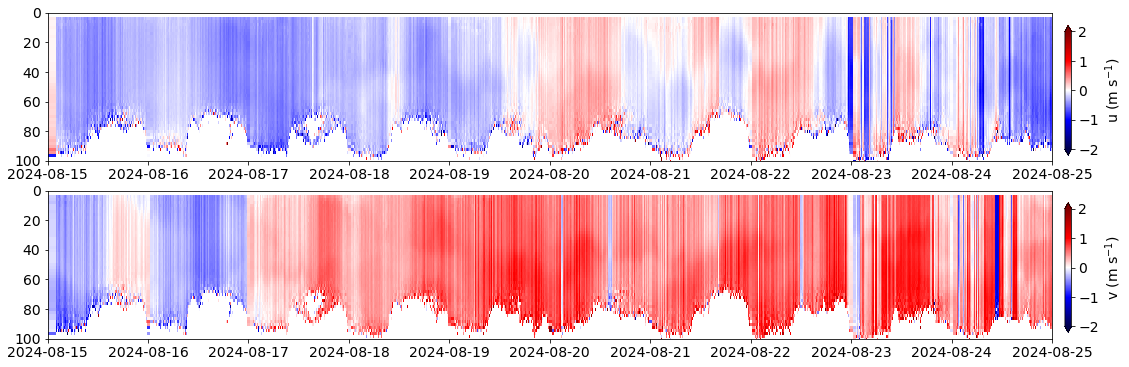

In [35]:
### plot time-depth color plots of u & v
tlim_plot = [datetime.datetime(int(year),8,15), datetime.datetime(int(year),8,25)]
zlim_plot = [0,100]
vellim_plot = [-2,2]
nrow = 2
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrow,1, figsize=(18, 6))
### plot u
plt.subplot(nrow,1,1)
cs = plt.pcolormesh( dtime, depth, u.transpose(), shading='nearest', vmin=vellim_plot[0],vmax=vellim_plot[1], cmap='seismic')
### colorbar
cbar_ax = fig.add_axes([.91,.55,.005,.3])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('u (m s$^{-1}$)')
### plot v
plt.subplot(nrow,1,2)
cs = plt.pcolormesh( dtime, depth, v.transpose(), shading='nearest', vmin=vellim_plot[0],vmax=vellim_plot[1], cmap='seismic')
### colorbar
cbar_ax = fig.add_axes([.91,.14,.005,.3])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('v (m s$^{-1}$)')
### figure settings
for i in range(nrow):
    plt.subplot(nrow,1,i+1)
    plt.xlim(tlim_plot)
    plt.ylim(zlim_plot)
    plt.gca().invert_yaxis()
    # plt.grid()

### save figure
plt.savefig('time-depth_uv_raw_'+year+'-SD'+platf_num+'_'+tlim_plot[0].strftime('%Y%m%d')+'-'+tlim_plot[1].strftime('%m%d')+\
    '.png',dpi=500,bbox_inches='tight')

In [37]:
### (2) shallow bottom (where it needs remove the bottom) 
### load merged adcp nc file
year = '2024'
platf_num = '1083'
###
filename = 'adcp-10min-merge-'+year+'-SD'+platf_num+'.nc'
ds = nc.Dataset(filename)
print(ds)
time = ds.variables['time'][:]
dtime = np.array([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=time[i]) for i in range(len(time))])
u = ds.variables['vel_east'][:]
print(ds.variables['vel_east'].units)
v = ds.variables['vel_north'][:]
depth = ds.variables['depth'][:]
ds.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Merged files for 2024 SD-1083
    subtitle: Only selected variables for adcp measurements are here. Temporal resolution is ~10-minute.
    dimensions(sizes): depth(50), time(2507), beam(4)
    variables(dimensions): float64 depth(depth), float64 time(time), float64 longitude(time), float64 latitude(time), float64 pitch(time), float64 roll(time), float64 heading(time), float64 vehicle_vel_east(time), float64 vehicle_vel_north(time), float64 vehicle_vel_up(time), float64 bt_vel_east(time), float64 bt_vel_north(time), float64 bt_vel_up(time), float64 vel_east(time, depth), float64 vel_north(time, depth), float64 vel_up(time, depth), float64 error_vel(time, depth), float64 percent_good_4_beam(time, depth), float64 percent_good_3_beam(time, depth), float64 percent_good(time, depth), float64 bt_range(time, beam), float64 bt_cor(time, beam), float64 bt_amp(time, beam), float64 bt_percent_g

<Figure size 432x288 with 0 Axes>

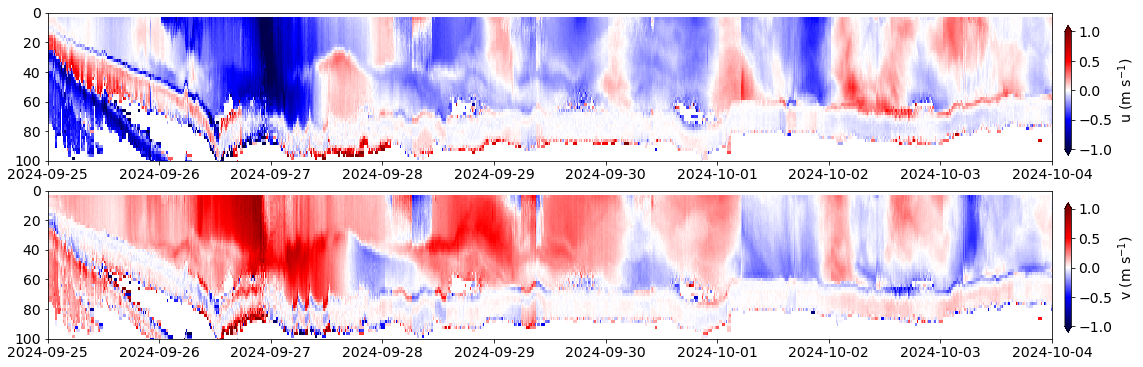

In [41]:
### plot time-depth color plots of u & v
tlim_plot = [datetime.datetime(int(year),9,25), datetime.datetime(int(year),10,4)]
zlim_plot = [0,100]
vellim_plot = [-1,1]
nrow = 2
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrow,1, figsize=(18, 6))
### plot u
plt.subplot(nrow,1,1)
cs = plt.pcolormesh( dtime, depth, u.transpose(), shading='nearest', vmin=vellim_plot[0],vmax=vellim_plot[1], cmap='seismic')
### colorbar
cbar_ax = fig.add_axes([.91,.55,.005,.3])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('u (m s$^{-1}$)')
### plot v
plt.subplot(nrow,1,2)
cs = plt.pcolormesh( dtime, depth, v.transpose(), shading='nearest', vmin=vellim_plot[0],vmax=vellim_plot[1], cmap='seismic')
### colorbar
cbar_ax = fig.add_axes([.91,.14,.005,.3])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('v (m s$^{-1}$)')
### figure settings
for i in range(nrow):
    plt.subplot(nrow,1,i+1)
    plt.xlim(tlim_plot)
    plt.ylim(zlim_plot)
    plt.gca().invert_yaxis()
    # plt.grid()

### save figure
plt.savefig('time-depth_uv_raw_'+year+'-SD'+platf_num+'_'+tlim_plot[0].strftime('%Y%m%d')+'-'+tlim_plot[1].strftime('%m%d')+\
    '.png',dpi=500,bbox_inches='tight')

In [130]:
# (3) remove tides (find a case where tidal current is significant): Some data is on the portal but not delievered to PMEL (ex: 9/11~9/13,9/17)
### load merged adcp nc file
year = '2024'
platf_num = '1045'
###
filename = 'adcp-5min-merge-'+year+'-SD'+platf_num+'.nc'
ds = nc.Dataset(filename)
print(ds)
time = ds.variables['time'][:]
dtime = np.array([datetime.datetime(int(year),1,1)+datetime.timedelta(seconds=time[i]) for i in range(len(time))])
u = ds.variables['vel_east'][:]
print(ds.variables['vel_east'].units)
v = ds.variables['vel_north'][:]
depth = ds.variables['depth'][:]
lon = ds.variables['longitude'][:]
lat = ds.variables['latitude'][:]
ds.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: Merged files for 2024 SD-1045
    subtitle: Only selected variables for adcp measurements are here. Temporal resolution is ~5-minute.
    dimensions(sizes): depth(50), time(700), beam(4)
    variables(dimensions): float64 depth(depth), float64 time(time), float64 longitude(time), float64 latitude(time), float64 pitch(time), float64 roll(time), float64 heading(time), float64 vehicle_vel_east(time), float64 vehicle_vel_north(time), float64 vehicle_vel_up(time), float64 bt_vel_east(time), float64 bt_vel_north(time), float64 bt_vel_up(time), float64 vel_east(time, depth), float64 vel_north(time, depth), float64 vel_up(time, depth), float64 error_vel(time, depth), float64 percent_good_4_beam(time, depth), float64 percent_good_3_beam(time, depth), float64 percent_good(time, depth), float64 bt_range(time, beam), float64 bt_cor(time, beam), float64 bt_amp(time, beam), float64 bt_percent_goo

In [62]:
# x = np.array([1,2,3,4,5])
# mx = np.ma.masked_array(x,mask=[0,0,0,1,0])
# test = np.ma.getdata(mx)
# print(np.ma.getmask(mx))
# print(x)
# print(mx)
# print(test, np.ma.is_masked(test))
# print(np.ma.getmask(depth),depth)
# print(np.ma.getdata(depth))
print(u.shape)

(700, 50)


<Figure size 432x288 with 0 Axes>

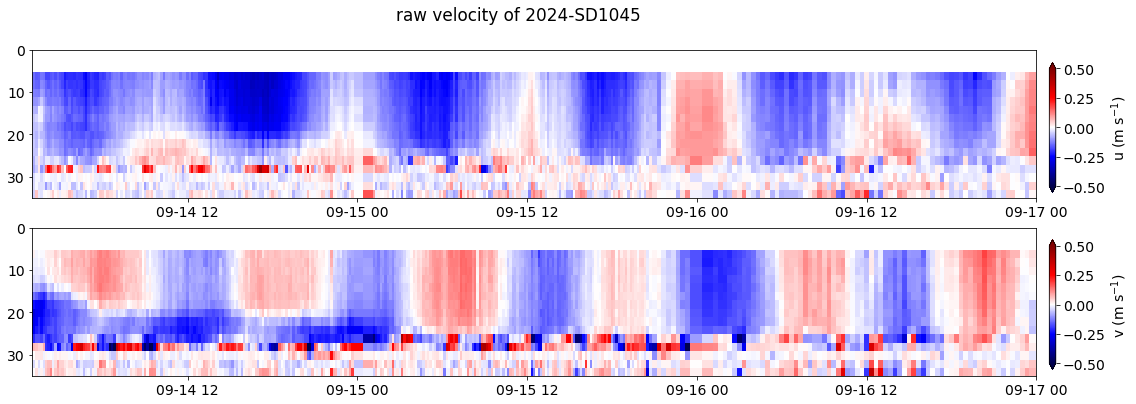

In [123]:
### plot time-depth color plots of u & v
tlim_plot = [datetime.datetime(int(year),9,14,1), datetime.datetime(int(year),9,17)]
zlim_plot = [0,35]
vellim_plot = [-0.5,0.5]
iz = ~np.ma.getmask( depth )
nrow = 2
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrow,1, figsize=(18, 6))
### plot u
plt.subplot(nrow,1,1)
cs = plt.pcolormesh( dtime, depth[iz], u[:,iz].transpose(), shading='nearest', vmin=vellim_plot[0],vmax=vellim_plot[1], cmap='seismic')
### colorbar
cbar_ax = fig.add_axes([.91,.55,.005,.3])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('u (m s$^{-1}$)')
### plot v
plt.subplot(nrow,1,2)
cs = plt.pcolormesh( dtime, depth[iz], v[:,iz].transpose(), shading='nearest', vmin=vellim_plot[0],vmax=vellim_plot[1], cmap='seismic')
### colorbar
cbar_ax = fig.add_axes([.91,.14,.005,.3])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('v (m s$^{-1}$)')
### figure settings
for i in range(nrow):
    plt.subplot(nrow,1,i+1)
    plt.xlim(tlim_plot)
    plt.ylim(zlim_plot)
    plt.gca().invert_yaxis()
    # plt.grid()

plt.suptitle('raw velocity of '+year+'-SD'+platf_num)
### save figure
plt.savefig('time-depth_uv_raw_'+year+'-SD'+platf_num+'_'+tlim_plot[0].strftime('%Y%m%d')+'-'+tlim_plot[1].strftime('%m%d')+\
    '.png',dpi=500,bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

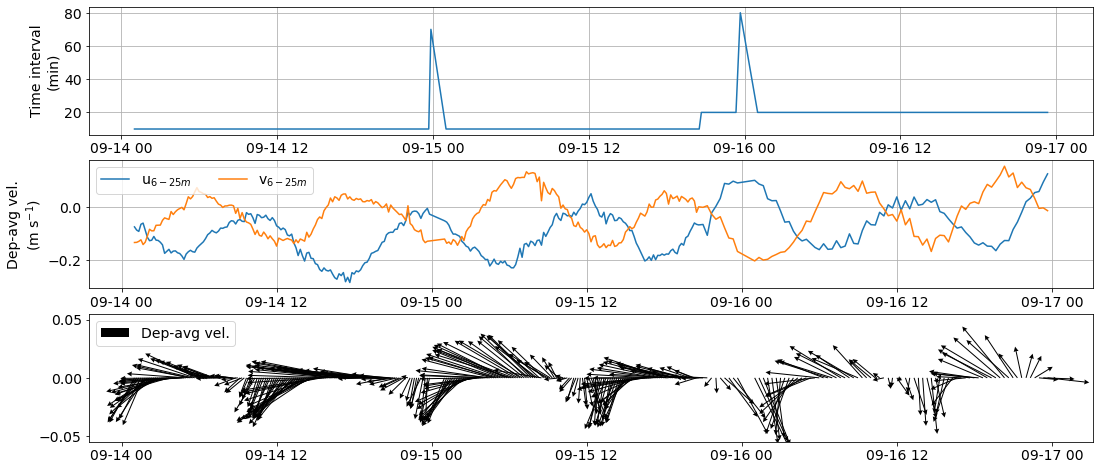

In [110]:
### assume they are quasi-Eulerian. 
### compute barotropic velocity
tlim_pick =[datetime.datetime(int(year),9,14,1), datetime.datetime(int(year),9,17)]
it_pick = np.where( (dtime>= tlim_pick[0]) & (dtime<= tlim_pick[1]) )[0]
zlim = [6,25]
iz = ( (~np.ma.getmask( depth )) & (depth> 6) & (depth< 25) )
u_pick = u[np.ix_(it_pick,iz)]
v_pick = v[np.ix_(it_pick,iz)]
### plot figure
nrow = 3
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrow,1, figsize=(18, 8))
### plot time intervals
plt.subplot(nrow,1,1)
plt.plot(dtime[it_pick][0:-1],np.diff(time[it_pick])/60)
plt.grid(); plt.ylabel('Time interval\n(min)')
### plot vertically averaged velocity - barotropic component
u_zavg = u_pick.mean(axis=1)
v_zavg = v_pick.mean(axis=1)
plt.subplot(nrow,1,2)
plt.plot(dtime[it_pick],u_zavg,label='u$_{'+str(int(zlim[0]))+'-'+str(int(zlim[1]))+'m}$')
plt.plot(dtime[it_pick],v_zavg,label='v$_{'+str(int(zlim[0]))+'-'+str(int(zlim[1]))+'m}$')
plt.legend(ncol=2, loc='upper left')
plt.grid(); plt.ylabel('Dep-avg vel.\n(m s$^{-1}$)')
### plot quiver plot
plt.subplot(nrow,1,3)
plt.quiver(dtime[it_pick],np.zeros((len(it_pick),)), u_zavg, v_zavg, scale=3, headwidth=5, width=0.001,label='Dep-avg vel.')
plt.legend(loc='upper left')

<Figure size 432x288 with 0 Axes>

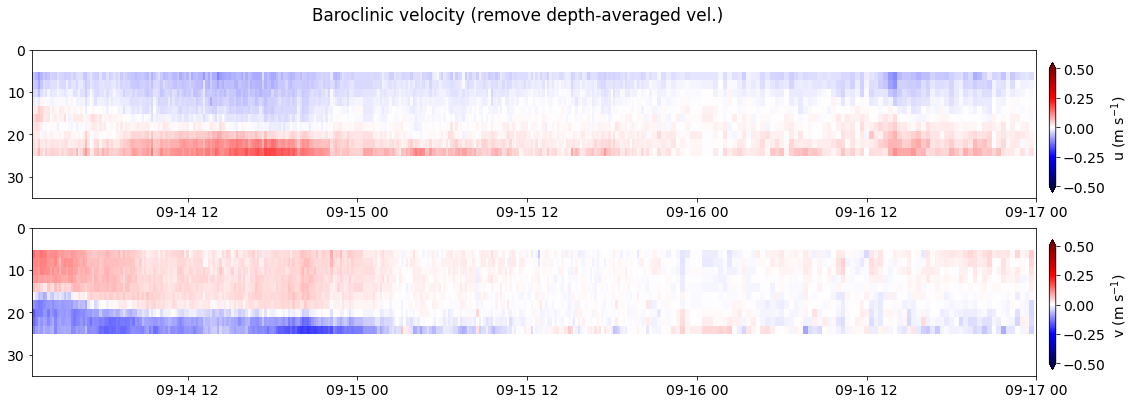

In [121]:
### plot baroclinic velocity
nrow = 2
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrow,1, figsize=(18, 6))
### plot u
plt.subplot(nrow,1,1)
test = u[np.ix_(it_pick,iz)].transpose()-u_zavg
cs = plt.pcolormesh( dtime[it_pick], depth[iz], test, shading='nearest', vmin=vellim_plot[0],vmax=vellim_plot[1], cmap='seismic')
### colorbar
cbar_ax = fig.add_axes([.91,.55,.005,.3])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('u (m s$^{-1}$)')
### plot v
plt.subplot(nrow,1,2)
test = v[np.ix_(it_pick,iz)].transpose()-v_zavg
cs = plt.pcolormesh( dtime[it_pick], depth[iz], test, shading='nearest', vmin=vellim_plot[0],vmax=vellim_plot[1], cmap='seismic')
### colorbar
cbar_ax = fig.add_axes([.91,.14,.005,.3])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('v (m s$^{-1}$)')
### figure settings
for i in range(nrow):
    plt.subplot(nrow,1,i+1)
    plt.xlim(tlim_plot)
    plt.ylim(zlim_plot)
    plt.gca().invert_yaxis()

plt.suptitle('Baroclinic velocity (remove depth-averaged vel.)')
### save figure
plt.savefig('time-depth_uv-minus-zavg('+str(int(zlim[0]))+'-'+str(int(zlim[1]))+'m)_'+year+'-SD'+platf_num+'_'+\
            tlim_plot[0].strftime('%Y%m%d')+'-'+tlim_plot[1].strftime('%m%d')+'.png',dpi=500,bbox_inches='tight')

In [139]:
print(time[0],dtime[0])
print((dtime[0]-datetime.datetime(2024,1,1)).total_seconds())

21870000.0 2024-09-10 03:00:00
21870000.0


<Figure size 432x288 with 0 Axes>

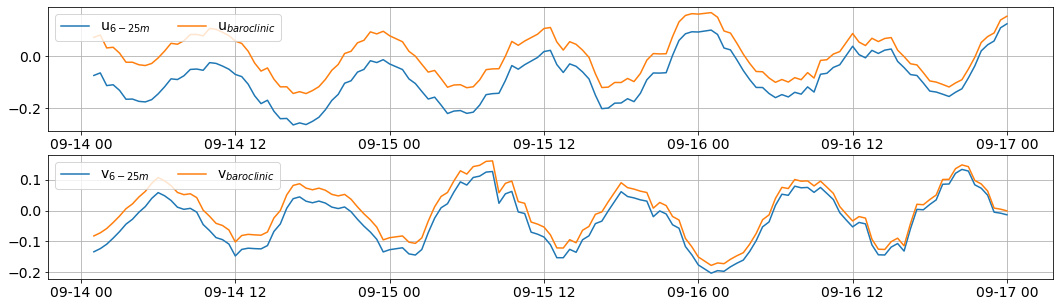

In [141]:
### compute spectra of u & v
### linear interpolate the depth-averaged (6-25m) u & v in time
nt = int((tlim_pick[1]-tlim_pick[0]).total_seconds()/(30*60)+1)
dtime_tintp = np.array([tlim_pick[0]+datetime.timedelta(seconds=i*30*60) for i in range(nt)])
time_tintp = np.array([(dtime_tintp[i]-datetime.datetime(int(year),1,1)).total_seconds() for i in range(nt)])
u_zavg_tintp = np.interp(time_tintp, time[it_pick], u_zavg)
v_zavg_tintp = np.interp(time_tintp, time[it_pick], v_zavg)
### pick a single level (depth-averaged vel) & de-trend
t = np.arange(len(u_zavg_tintp))
p = np.polyfit(t, u_zavg_tintp, 1)
u_detrend = u_zavg_tintp - np.polyval(p, t)
p = np.polyfit(t, v_zavg_tintp, 1)
v_detrend = v_zavg_tintp - np.polyval(p, t)
### plot depth-avg vel & depth-avg detrend vel.
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(2,1)
plt.gcf().set_size_inches(18, 5)
plt.subplot(2,1,1)
plt.plot(dtime_tintp, u_zavg_tintp, label='u$_{'+str(int(zlim[0]))+'-'+str(int(zlim[1]))+'m}$')
plt.plot(dtime_tintp, u_detrend, label='u$_{baroclinic}$')
plt.grid(); plt.legend(ncol=2,loc='upper left')
plt.subplot(2,1,2)
plt.plot(dtime_tintp, v_zavg_tintp, label='v$_{'+str(int(zlim[0]))+'-'+str(int(zlim[1]))+'m}$')
plt.plot(dtime_tintp, v_detrend, label='v$_{baroclinic}$')
plt.grid(); plt.legend(ncol=2,loc='upper left')

mean latitude: 34.21389145868372
local inertial freq= 8.178087653122224e-05 1/s


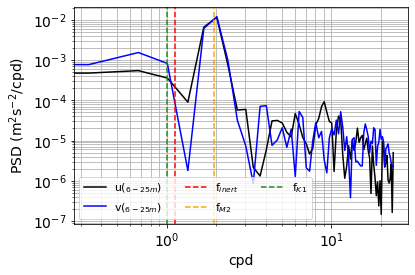

In [171]:
### plot PSD of U & V at a single depth
plt.clf()
f, Pxx = signal.periodogram(u_detrend, fs=2*24, window='hamming')
plt.loglog(f, Pxx, label='u($_{'+str(int(zlim[0]))+'-'+str(int(zlim[1]))+'m}$)',color='k')
f, Pxx = signal.periodogram(v_detrend, fs=2*24, window='hamming')
plt.loglog(f, Pxx, label='v($_{'+str(int(zlim[0]))+'-'+str(int(zlim[1]))+'m}$)',color='b')
plt.legend()
plt.xlabel('cpd')
plt.ylabel('PSD (m$^{2}$s$^{-2}$/cpd)')
plt.grid(True, which='both', ls='-')

### add frequency markers
mlat = lat[it_pick].mean(); print('mean latitude:',mlat)
f_inert = 2*(2*np.pi/86400)*np.sin(mlat/180*np.pi); print('local inertial freq=',f_inert,'1/s')
f_inert_cpd = 24/(2*np.pi/f_inert/3600) # cpd
f_m2_cpd = 24/(12.42) # cpd
f_k1_cpd = 24/23.93 # cpd
ylim = plt.ylim()
plt.loglog([f_inert_cpd, f_inert_cpd],[ylim[0],ylim[1]],'--',color='r',label='f$_{inert}$')
plt.loglog([f_m2_cpd, f_m2_cpd],[ylim[0],ylim[1]],'--',color='orange',label='f$_{M2}$')
plt.loglog([f_k1_cpd, f_k1_cpd],[ylim[0],ylim[1]],'--',color='forestgreen',label='f$_{K1}$')
plt.ylim(ylim)
plt.legend(ncol=3,loc='lower left',fontsize=11)

### save figure
plt.savefig('psd_uv-zavg('+str(int(zlim[0]))+'-'+str(int(zlim[1]))+'m)_'+year+'-SD'+platf_num+'_'+\
            tlim_pick[0].strftime('%Y%m%d')+'-'+tlim_pick[1].strftime('%m%d')+'.png',dpi=500,bbox_inches='tight')

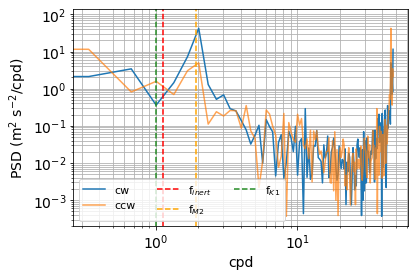

In [190]:
### interpoalte u_pick and v_pick in time as well
iz = ( (~np.ma.getmask( depth )) & (depth> 6) & (depth< 25) )
depth_pick = depth[iz]
nt = int((tlim_pick[1]-tlim_pick[0]).total_seconds()/(30*60)+1)
dtime_tintp = np.array([tlim_pick[0]+datetime.timedelta(seconds=i*30*60) for i in range(nt)])
time_tintp = np.array([(dtime_tintp[i]-datetime.datetime(int(year),1,1)).total_seconds() for i in range(nt)])
u_pick_tintp = np.nan*np.ones( ( len(dtime_tintp),len(depth_pick) ) )
v_pick_tintp = u_pick_tintp.copy()
for z in range( len(depth_pick) ):
    u_pick_tintp[:,z] = np.interp( time_tintp, time[it_pick], u_pick[:,z] )
    v_pick_tintp[:,z] = np.interp( time_tintp, time[it_pick], v_pick[:,z] )
iz_pick = 1
### compute rotary spectra
import oceans.ocfis
uc = u_pick_tintp[:,iz_pick] + 1j*v_pick_tintp[:,iz_pick]
puv, quv, cw, ccw, F = oceans.ocfis.spec_rot(uc.real, uc.imag)
### plot
plt.clf()
plt.rcParams.update({'font.size': 14})
# fig, ax = plt.subplots()
# plt.gcf().set_size_inches(10,7)
plt.loglog(F*2*24, cw, label='cw') 
plt.loglog(F*2*24, ccw,label='ccw',alpha=0.7)
plt.grid(True, which='both', ls='-')
plt.xlabel('cpd')
plt.ylabel('PSD (m$^{2}$ s$^{-2}$/cpd)')
### add frequency markers
ylim = plt.ylim()
plt.loglog([f_inert_cpd, f_inert_cpd],[ylim[0],ylim[1]],'--',color='r',label='f$_{inert}$')
plt.loglog([f_m2_cpd, f_m2_cpd],[ylim[0],ylim[1]],'--',color='orange',label='f$_{M2}$')
plt.loglog([f_k1_cpd, f_k1_cpd],[ylim[0],ylim[1]],'--',color='forestgreen',label='f$_{K1}$')
plt.ylim(ylim)
plt.legend(ncol=3,loc='lower left',fontsize=11)

### save figure
plt.savefig('rot-spec_uv('+str(int(depth_pick[iz_pick]))+'m)_'+year+'-SD'+platf_num+'_'+\
            tlim_pick[0].strftime('%Y%m%d')+'-'+tlim_pick[1].strftime('%m%d')+'.png',dpi=500,bbox_inches='tight')

/var/folders/kq/vqqqnf_x6vd47tpg4lf57cjr0002p5/T/ipykernel_10952/3927046702.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  puv, quv, cw_all_depth[:,z], ccw_all_depth[:,z], F = oceans.ocfis.spec_rot(uc.real, uc.imag)


<Figure size 432x288 with 0 Axes>

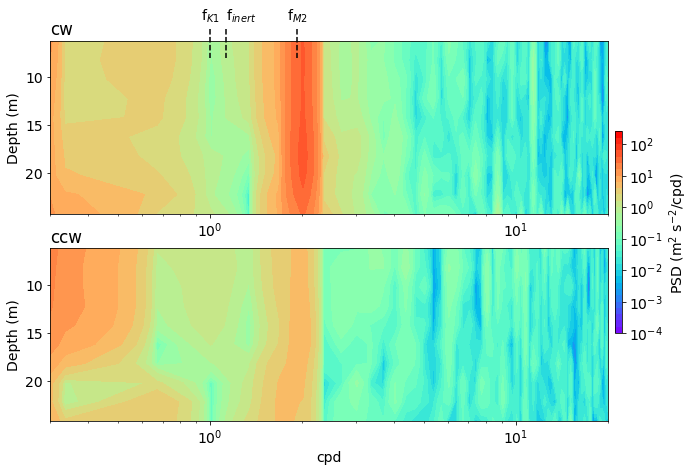

In [263]:
### compute and plot whole depths of rotary spectra
cw_all_depth = np.nan*np.ones( (len(F), len(depth_pick)))
ccw_all_depth = cw_all_depth.copy()

for z in range( len(depth_pick) ):
    uc = u_pick_tintp[:,z] + 1j*v_pick_tintp[:,z]
    puv, quv, cw_all_depth[:,z], ccw_all_depth[:,z], F = oceans.ocfis.spec_rot(uc.real, uc.imag)

iF_pick = F< 0.9
lev_exp = np.arange(-4,2.5,0.2)
levs = np.power(10, lev_exp)

### plot
nrow = 2
plt.clf()
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(nrow,1)
plt.gcf().set_size_inches(10,7)
### plot cw
plt.subplot(nrow,1,1)
cs = plt.contourf( F[iF_pick]*2*24, depth_pick, cw_all_depth[iF_pick,:].transpose(), levs, \
                  norm=matplotlib.colors.LogNorm(),cmap=matplotlib.cm.rainbow )
plt.title('cw',loc='left')#,y=1,pad=-15)
ylim = plt.ylim()
plt.semilogx([f_inert_cpd, f_inert_cpd],[5,8],'--',color='k',label='f$_{inert}$',clip_on=False)
plt.semilogx([f_m2_cpd, f_m2_cpd],[5,8],'--',color='k',label='f$_{M2}$',clip_on=False)
plt.semilogx([f_k1_cpd, f_k1_cpd],[5,8],'--',color='k',label='f$_{K1}$',clip_on=False)
plt.text(f_inert_cpd, 4,'f$_{inert}$',clip_on=False,ha='left')
plt.text(f_m2_cpd, 4,'f$_{M2}$',clip_on=False,ha='center')
plt.text(f_k1_cpd, 4,'f$_{K1}$',clip_on=False,ha='center')
### plot ccw
plt.subplot(nrow,1,2)
cs = plt.contourf( F[iF_pick]*2*24, depth_pick, ccw_all_depth[iF_pick,:].transpose(), levs, \
                  norm=matplotlib.colors.LogNorm(),cmap=matplotlib.cm.rainbow )
plt.title('ccw',loc='left')

### add color bar
cbar_ax = fig.add_axes([.91,.3,.01,.4])
axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
axf.set_label('PSD (m$^{2}$ s$^{-2}$/cpd)')
axf.set_ticks(np.logspace(-4,2,7))
### figure settings
for i in range( nrow ):
    plt.subplot(nrow,1,i+1)
    plt.xlim([3e-1, 20])
    plt.ylim(ylim)
    plt.xscale("log"); plt.gca().invert_yaxis()
    plt.ylabel('Depth (m)')
    if i == 1:
        plt.xlabel('cpd')
    
### save figure
plt.savefig('rot-spec_uv(tz-plot)_'+year+'-SD'+platf_num+'_'+\
            tlim_pick[0].strftime('%Y%m%d')+'-'+tlim_pick[1].strftime('%m%d')+'.png',dpi=500,bbox_inches='tight')